In [0]:
 class MyLinearRegression:
    def __init__(self, weight=500 , bias=15, learning_rate=0.0005,
                 iterations=200):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.it= []
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] -(self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
            self.it.append(i)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], 
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


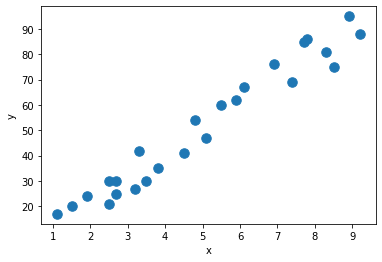

In [13]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y,s=90)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split



X = studentscores.iloc[:, :-1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [483.44733]	 Bias: [12.41895]	 Cost: 3797094.901296486
Iteration: 1	 Weight: [467.46495031]	 Bias: [9.92721704]	 Cost: 3539957.419193694
Iteration: 2	 Weight: [452.03321062]	 Bias: [7.52172348]	 Cost: 3300234.851990161
Iteration: 3	 Weight: [437.13313772]	 Bias: [5.19949774]	 Cost: 3076747.7551048803
Iteration: 4	 Weight: [422.74641213]	 Bias: [2.9576706]	 Cost: 2868396.5631598933
Iteration: 5	 Weight: [408.85534562]	 Bias: [0.79347173]	 Cost: 2674156.1800719462
Iteration: 6	 Weight: [395.44285942]	 Bias: [-1.29577376]	 Cost: 2493070.9355362346
Iteration: 7	 Weight: [382.49246326]	 Bias: [-3.31264856]	 Cost: 2324249.8830879307
Iteration: 8	 Weight: [369.98823504]	 Bias: [-5.25964642]	 Cost: 2166862.416607752
Iteration: 9	 Weight: [357.91480132]	 Bias: [-7.13917513]	 Cost: 2020134.1837045879
Iteration: 10	 Weight: [346.25731834]	 Bias: [-8.95355951]	 Cost: 1883343.2758688577
Iteration: 11	 Weight: [335.00145383]	 Bias: [-10.7050443]	 Cost: 1755816.676651995
Iterati

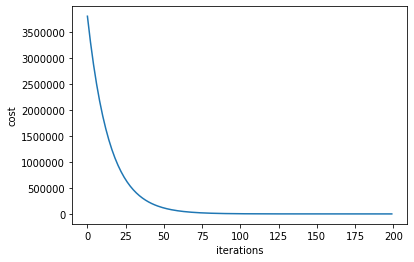

In [22]:
iterations=[1,2,3,4,5,6,7,8,9,10]
cost =[102.91008189424169,91.13317278598234,80.94548387910852,72.13255889976814,64.50888123548864,57.91396869153091,52.2089952377883,47.27386863183723,43.00470240023128,39.31162896162283]
plt.plot(regressor.it,regressor.cost_trend)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()